In [97]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import  classification_report

# Load Data

In [98]:
churn = pd.read_csv('/content/churn_Dataset.csv')

In [99]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# check null

In [101]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Encoding Categorical Data

In [102]:
churn = churn.drop(['customerID'],axis=1)

In [103]:
encoder = LabelEncoder()
churn['Churn'] = encoder.fit_transform(churn['Churn'])

In [104]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [105]:
churn = pd.get_dummies(churn,drop_first=True)
churn.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [106]:
churn.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes     

In [107]:
churn.isna().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                 

In [108]:
churn['TotalCharges'].fillna(value=churn['TotalCharges'].median(),inplace=True)

# check outlier

<Figure size 1600x800 with 0 Axes>

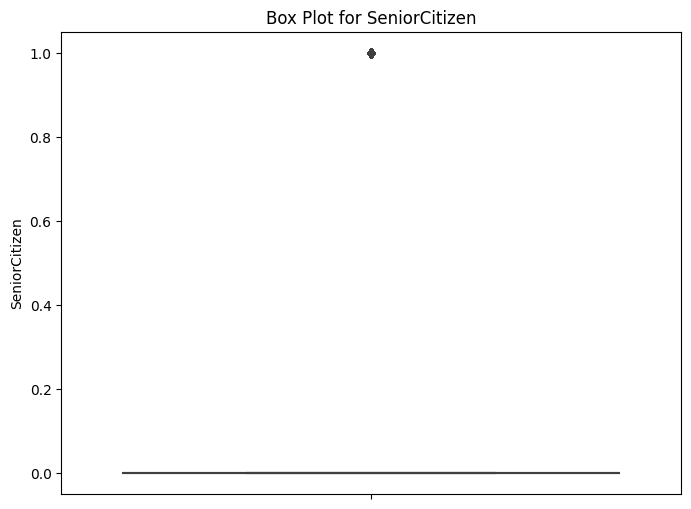

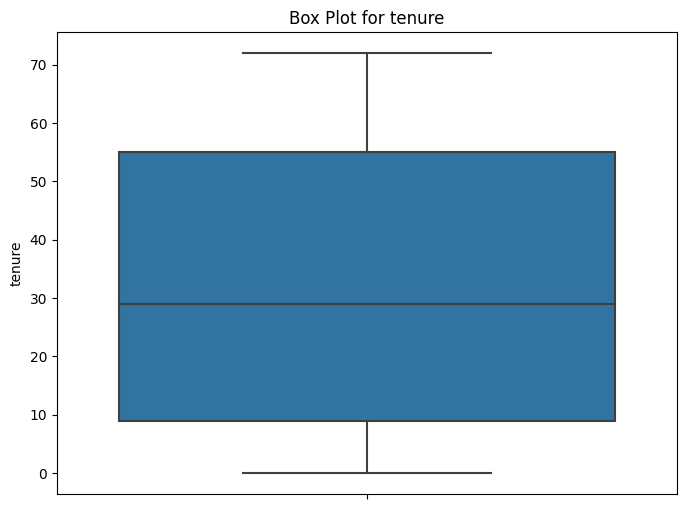

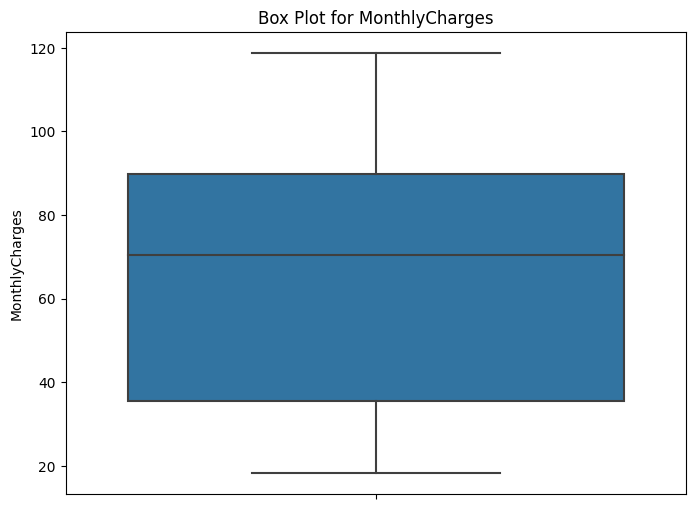

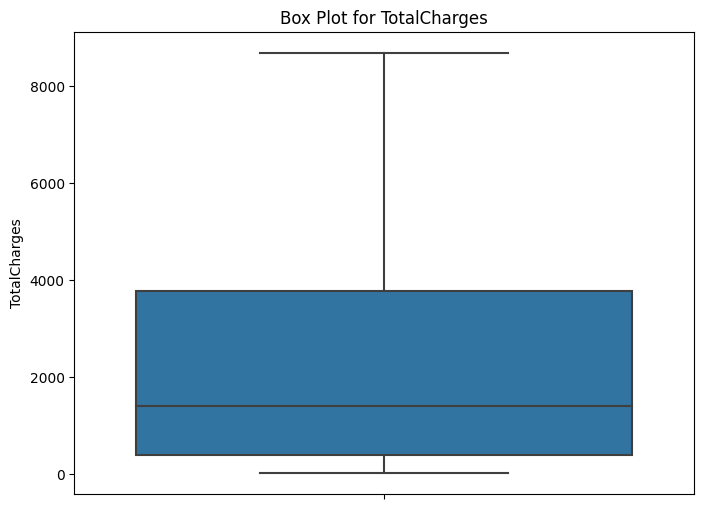

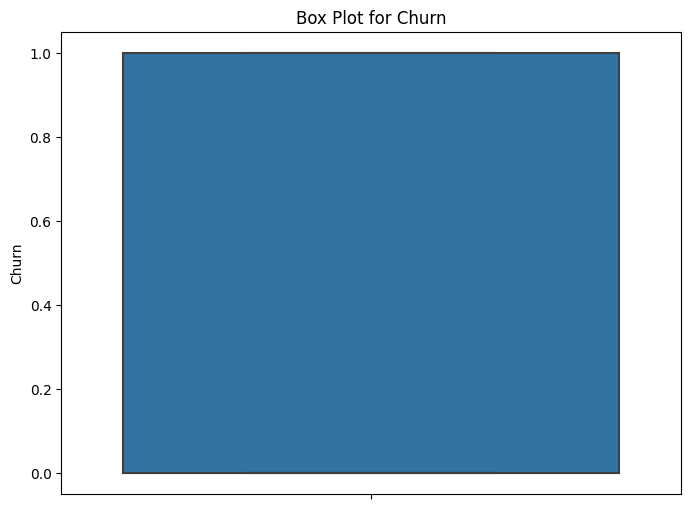

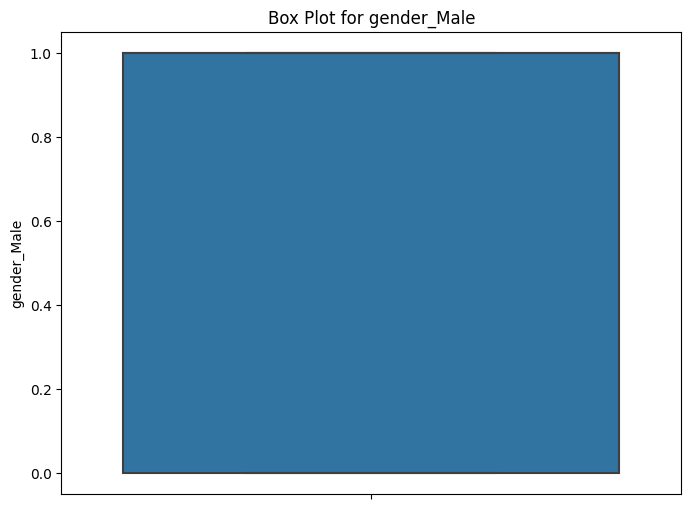

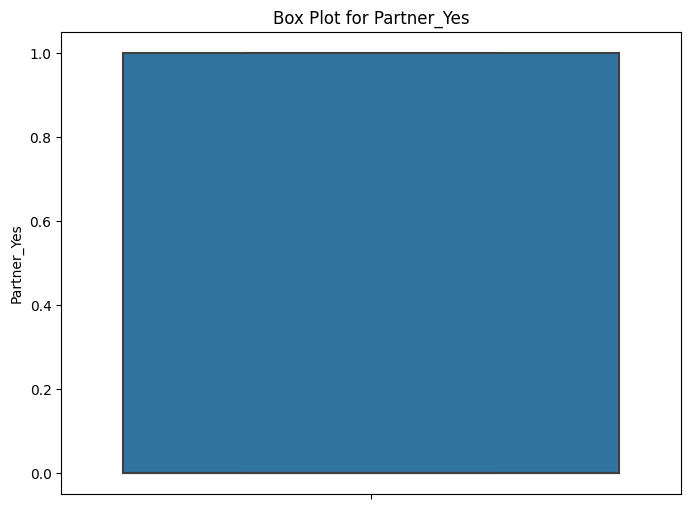

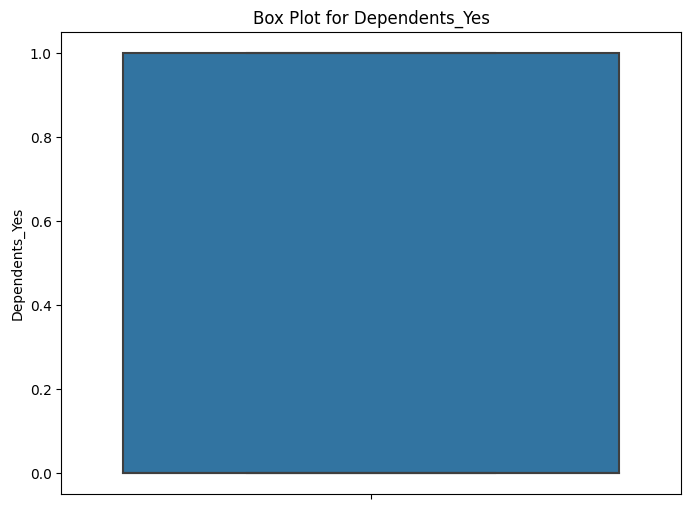

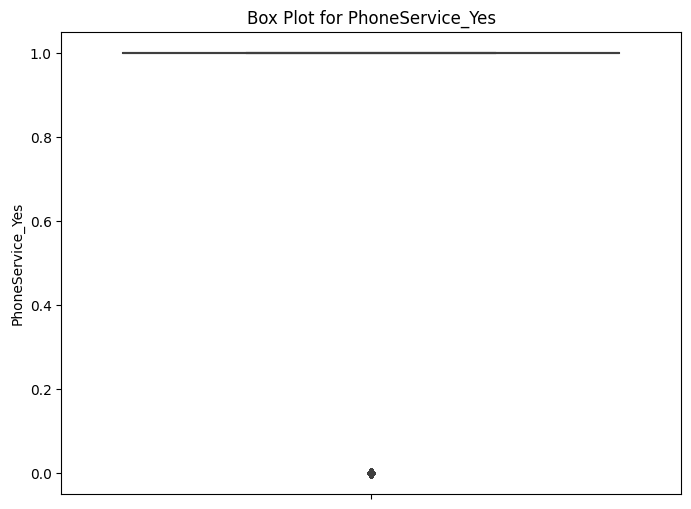

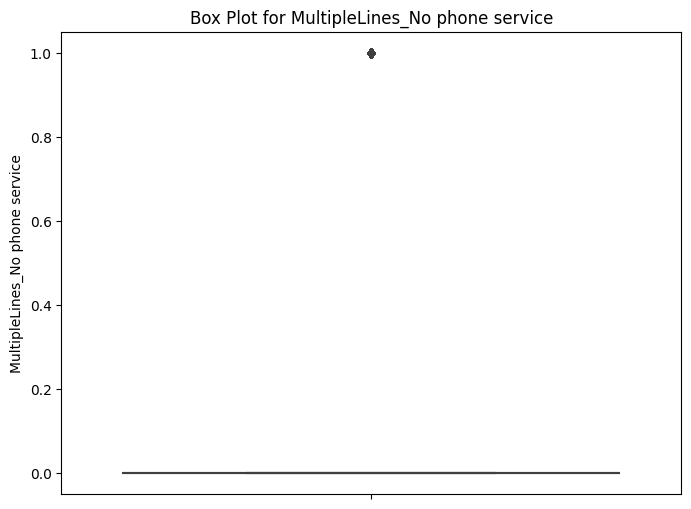

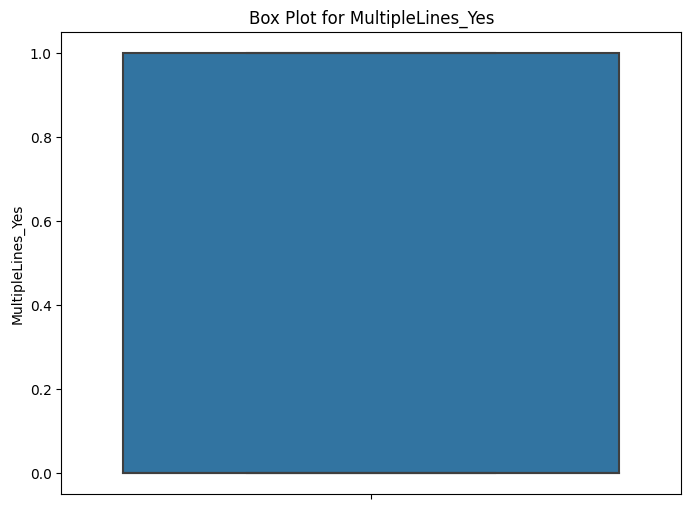

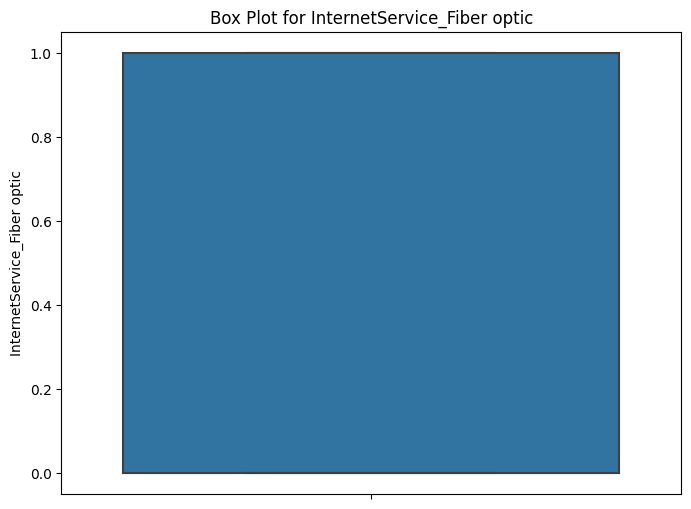

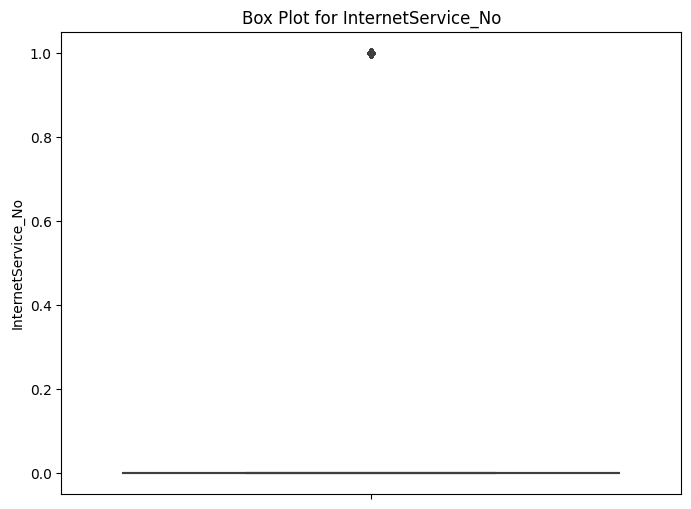

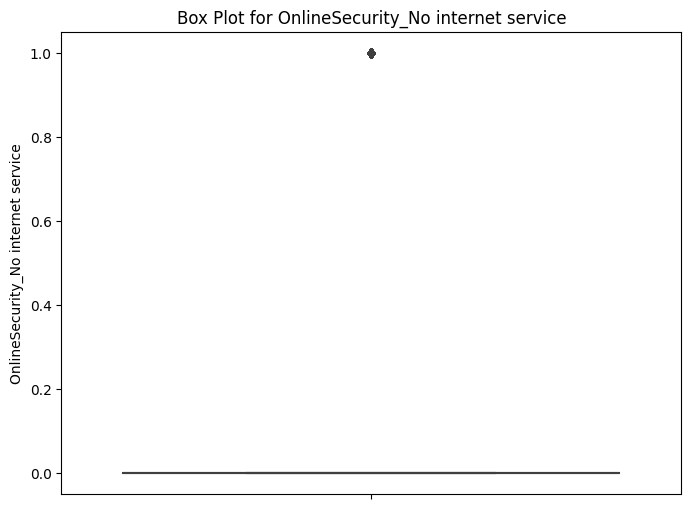

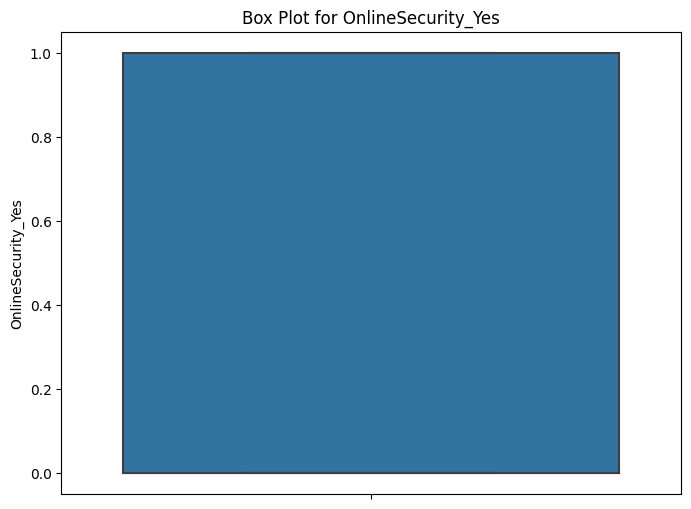

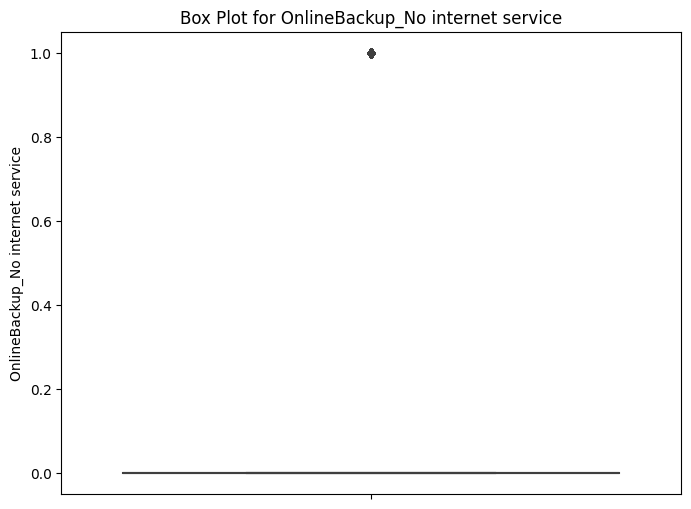

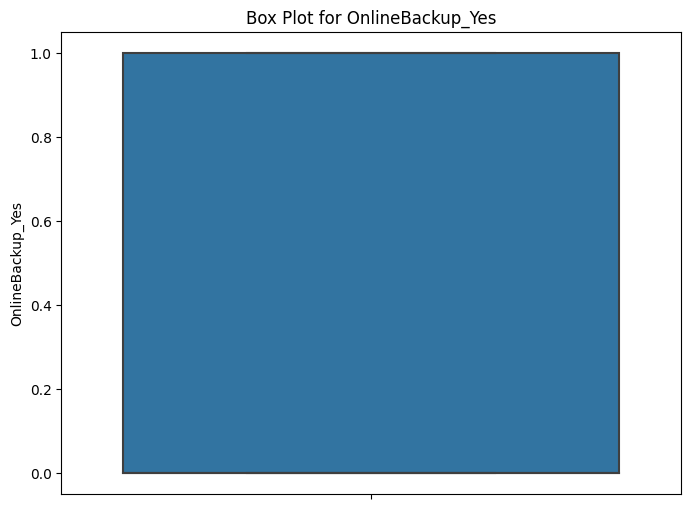

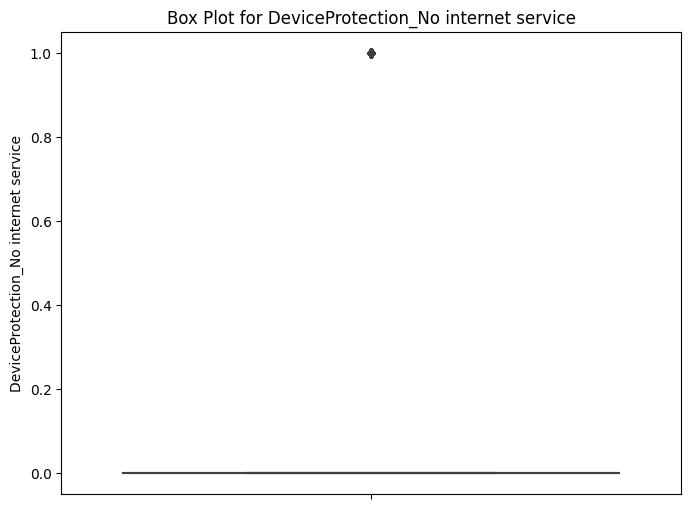

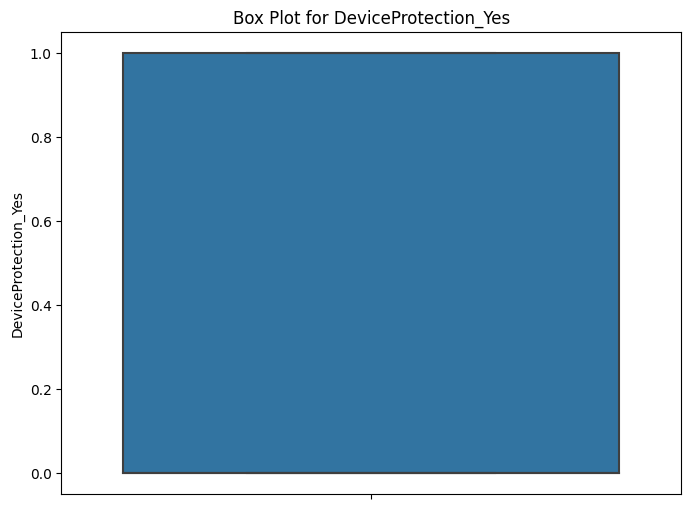

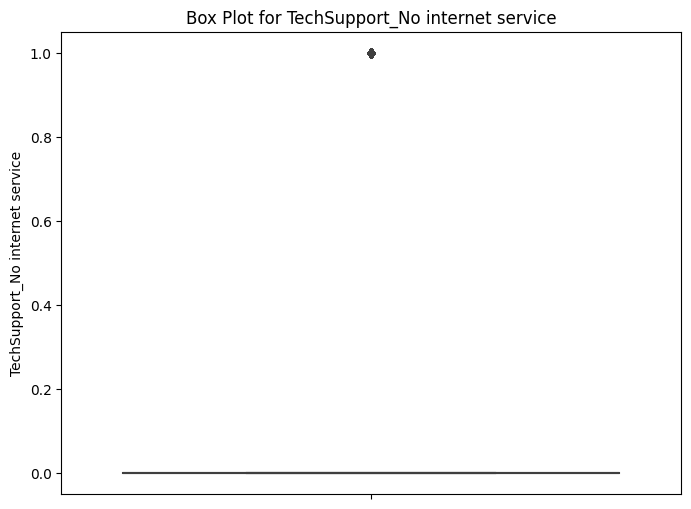

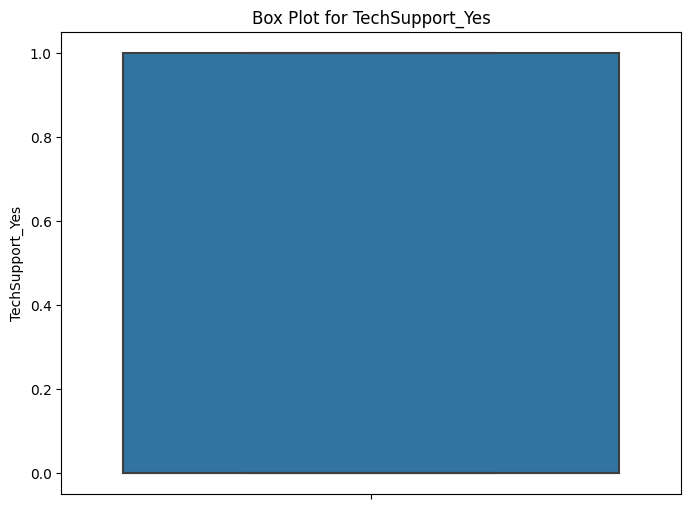

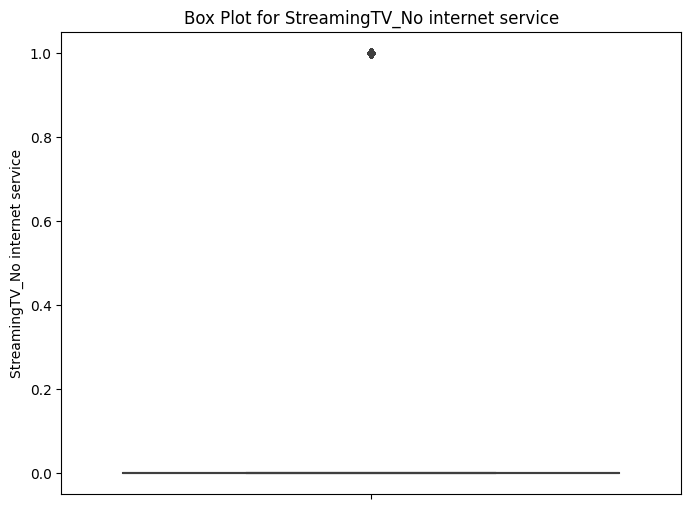

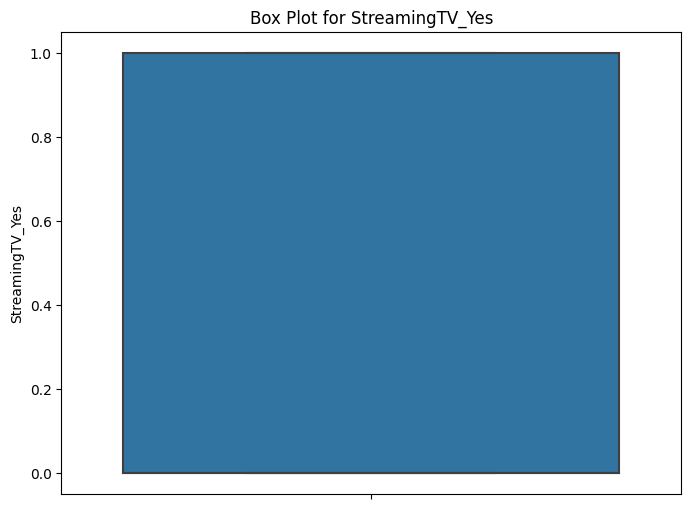

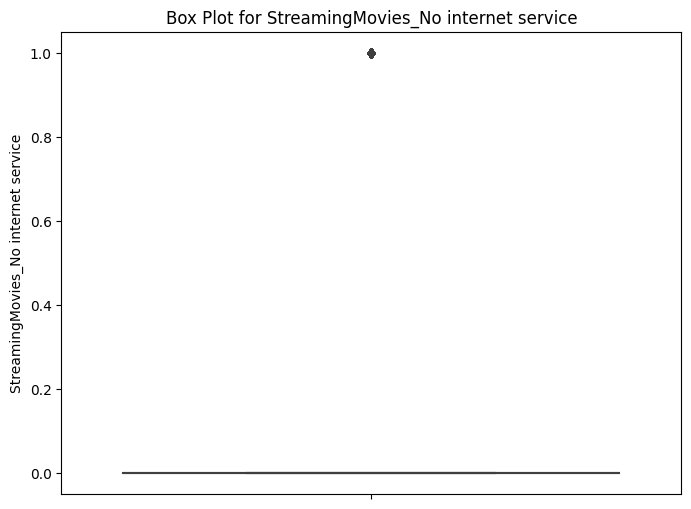

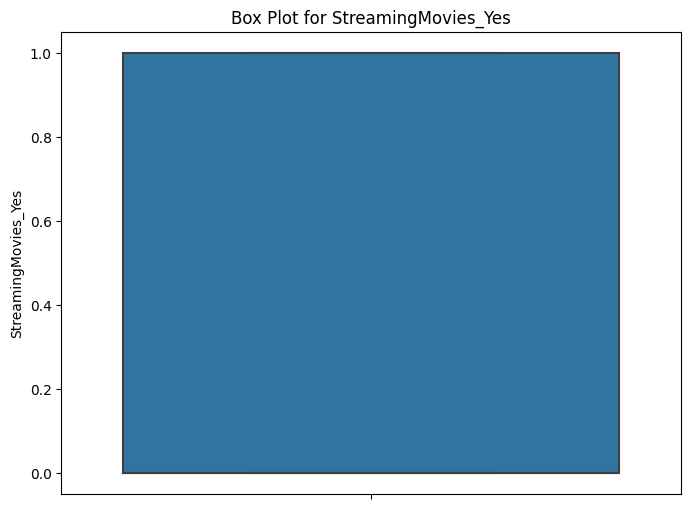

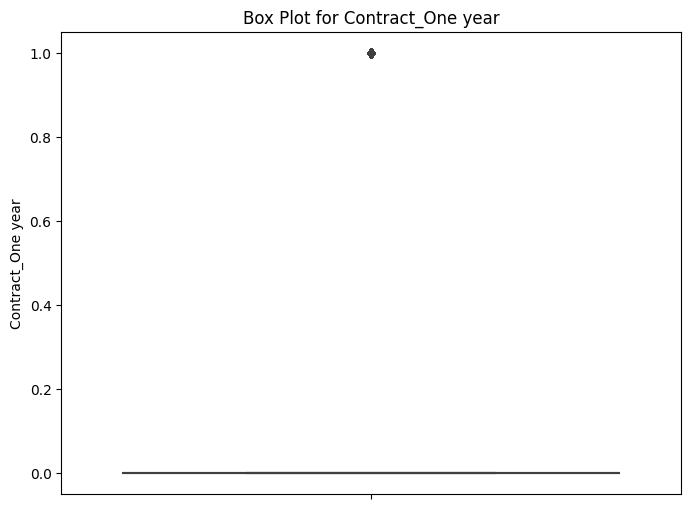

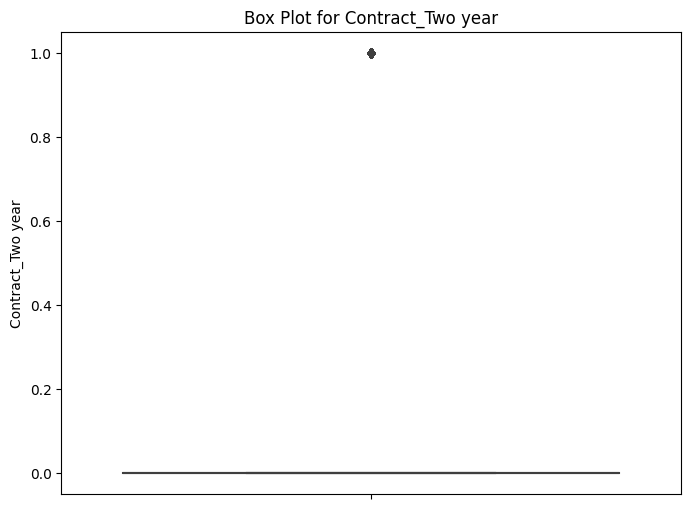

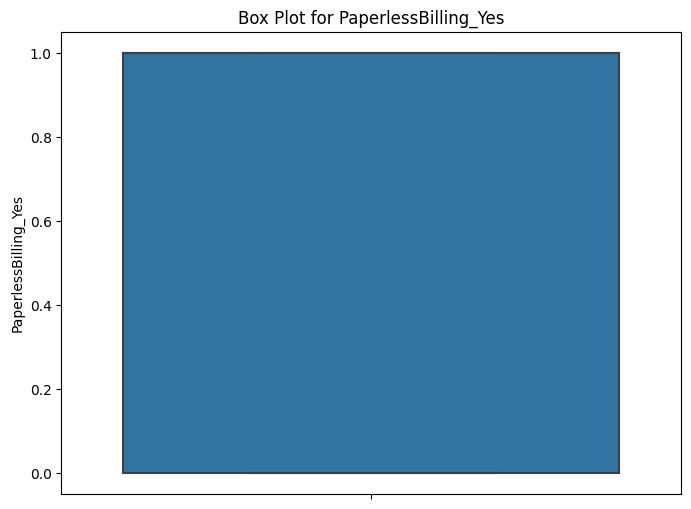

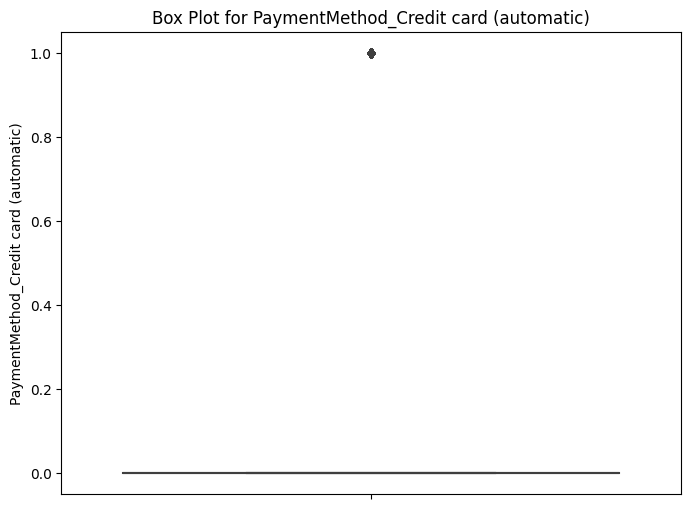

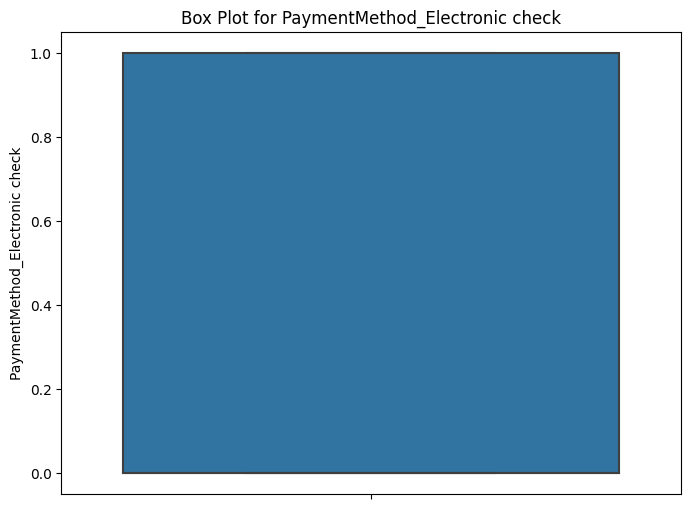

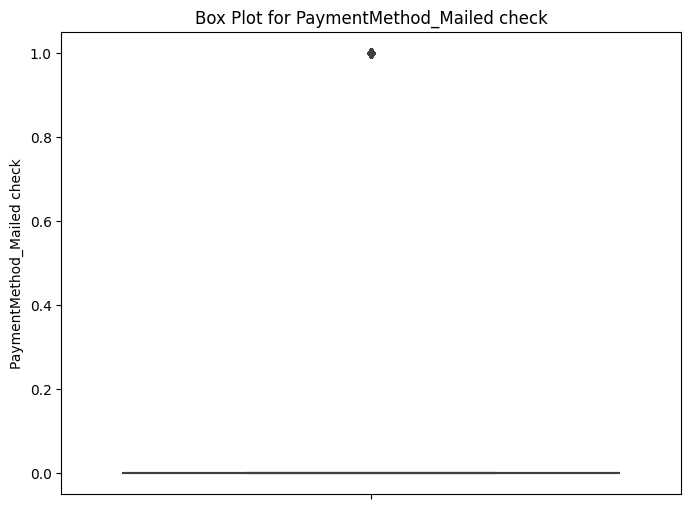

In [109]:
plt.figure(figsize=(16, 8))


for column in churn.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=churn[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

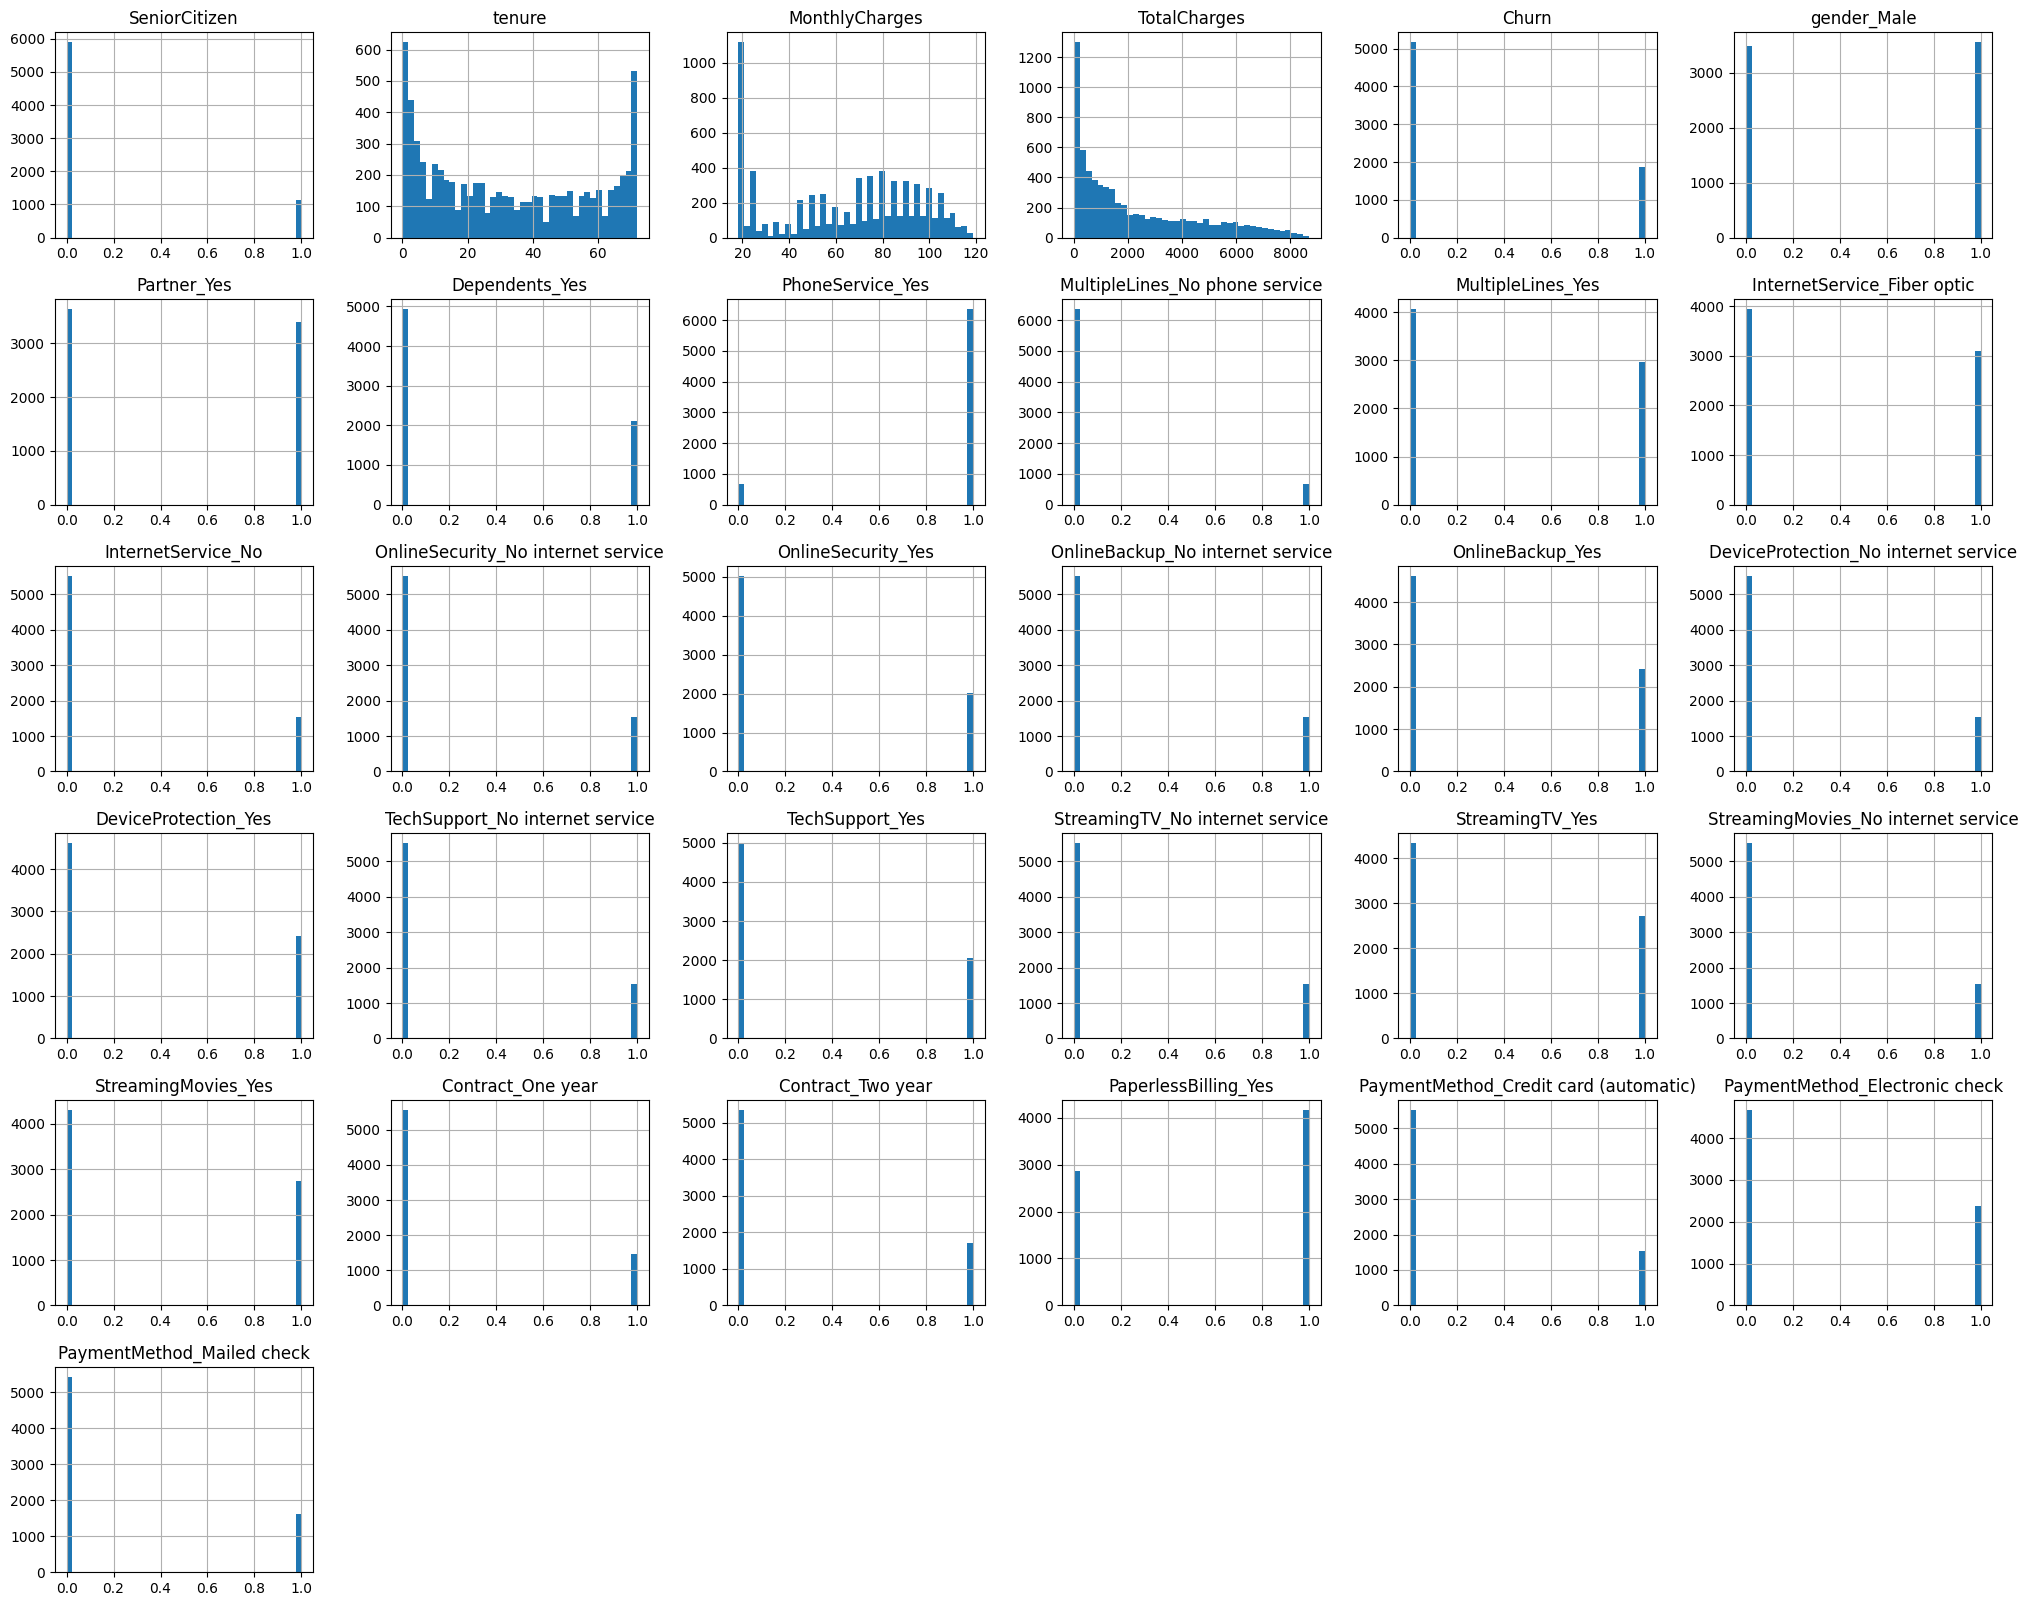

In [110]:
churn.hist(bins=40,figsize=(25,20))
plt.show()

In [111]:
x = churn.drop(['Churn'],axis=1)
y = churn['Churn']

In [112]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [113]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [114]:
from sklearn.feature_selection import SelectPercentile,chi2,f_classif
FeatureSelection = SelectPercentile(score_func=chi2,percentile=80)

In [115]:
x_selected = FeatureSelection.fit_transform(x,y)

In [116]:
pd.DataFrame(x_selected,columns=[i for i,j in zip(x.columns,FeatureSelection.get_support()) if j])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2.0,53.85,108.15,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,24.0,84.80,1990.50,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,0.0,72.0,103.20,7362.90,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0.0,11.0,29.60,346.45,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1.0,4.0,74.40,306.60,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [117]:
print ("selected features are : ",FeatureSelection.get_support())

selected features are :  [ True  True  True  True False  True  True False False False  True  True
  True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True]


In [118]:
churn.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.102652,0.150889,-0.001874,0.016479,-0.211185,0.008576,-0.008576,...,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.825464,-0.352229,0.005106,0.379697,0.159712,0.008448,-0.008448,...,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.650864,0.193356,-0.014569,0.096848,-0.113890,0.247398,-0.247398,...,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437
TotalCharges,0.102652,0.825464,0.650864,1.000000,-0.199037,-0.000002,0.318364,0.063593,0.113013,-0.113013,...,-0.374706,0.515279,-0.374706,0.519884,0.170649,0.356226,0.158055,0.182745,-0.059971,-0.294814
Churn,0.150889,-0.352229,0.193356,-0.199037,1.000000,-0.008612,-0.150448,-0.164221,0.011942,-0.011942,...,-0.227890,0.063228,-0.227890,0.061382,-0.177820,-0.302253,0.191825,-0.134302,0.301919,-0.091683
gender_Male,-0.001874,0.005106,-0.014569,-0.000002,-0.008612,1.000000,-0.001808,0.010517,-0.006488,0.006488,...,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744
Partner_Yes,0.016479,0.379697,0.096848,0.318364,-0.150448,-0.001808,1.000000,0.452676,0.017706,-0.017706,...,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125
Dependents_Yes,-0.211185,0.159712,-0.113890,0.063593,-0.164221,0.010517,0.452676,1.000000,-0.001762,0.001762,...,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071
PhoneService_Yes,0.008576,0.008448,0.247398,0.113013,0.011942,-0.006488,0.017706,-0.001762,1.000000,-1.000000,...,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319
MultipleLines_No phone service,-0.008576,-0.008448,-0.247398,-0.113013,-0.011942,0.006488,-0.017706,0.001762,-1.000000,1.000000,...,-0.172209,0.022574,-0.172209,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319


In [119]:
churn.duplicated().sum()

22

In [120]:
churn.drop_duplicates(inplace=True)

In [121]:
churn.corr()['Churn']

SeniorCitizen                            0.151619
tenure                                  -0.351508
MonthlyCharges                           0.194508
TotalCharges                            -0.197911
Churn                                    1.000000
gender_Male                             -0.008763
Partner_Yes                             -0.149135
Dependents_Yes                          -0.163459
PhoneService_Yes                         0.011323
MultipleLines_No phone service          -0.011323
MultipleLines_Yes                        0.041958
InternetService_Fiber optic              0.308170
InternetService_No                      -0.228533
OnlineSecurity_No internet service      -0.228533
OnlineSecurity_Yes                      -0.170520
OnlineBackup_No internet service        -0.228533
OnlineBackup_Yes                        -0.081092
DeviceProtection_No internet service    -0.228533
DeviceProtection_Yes                    -0.064944
TechSupport_No internet service         -0.228533


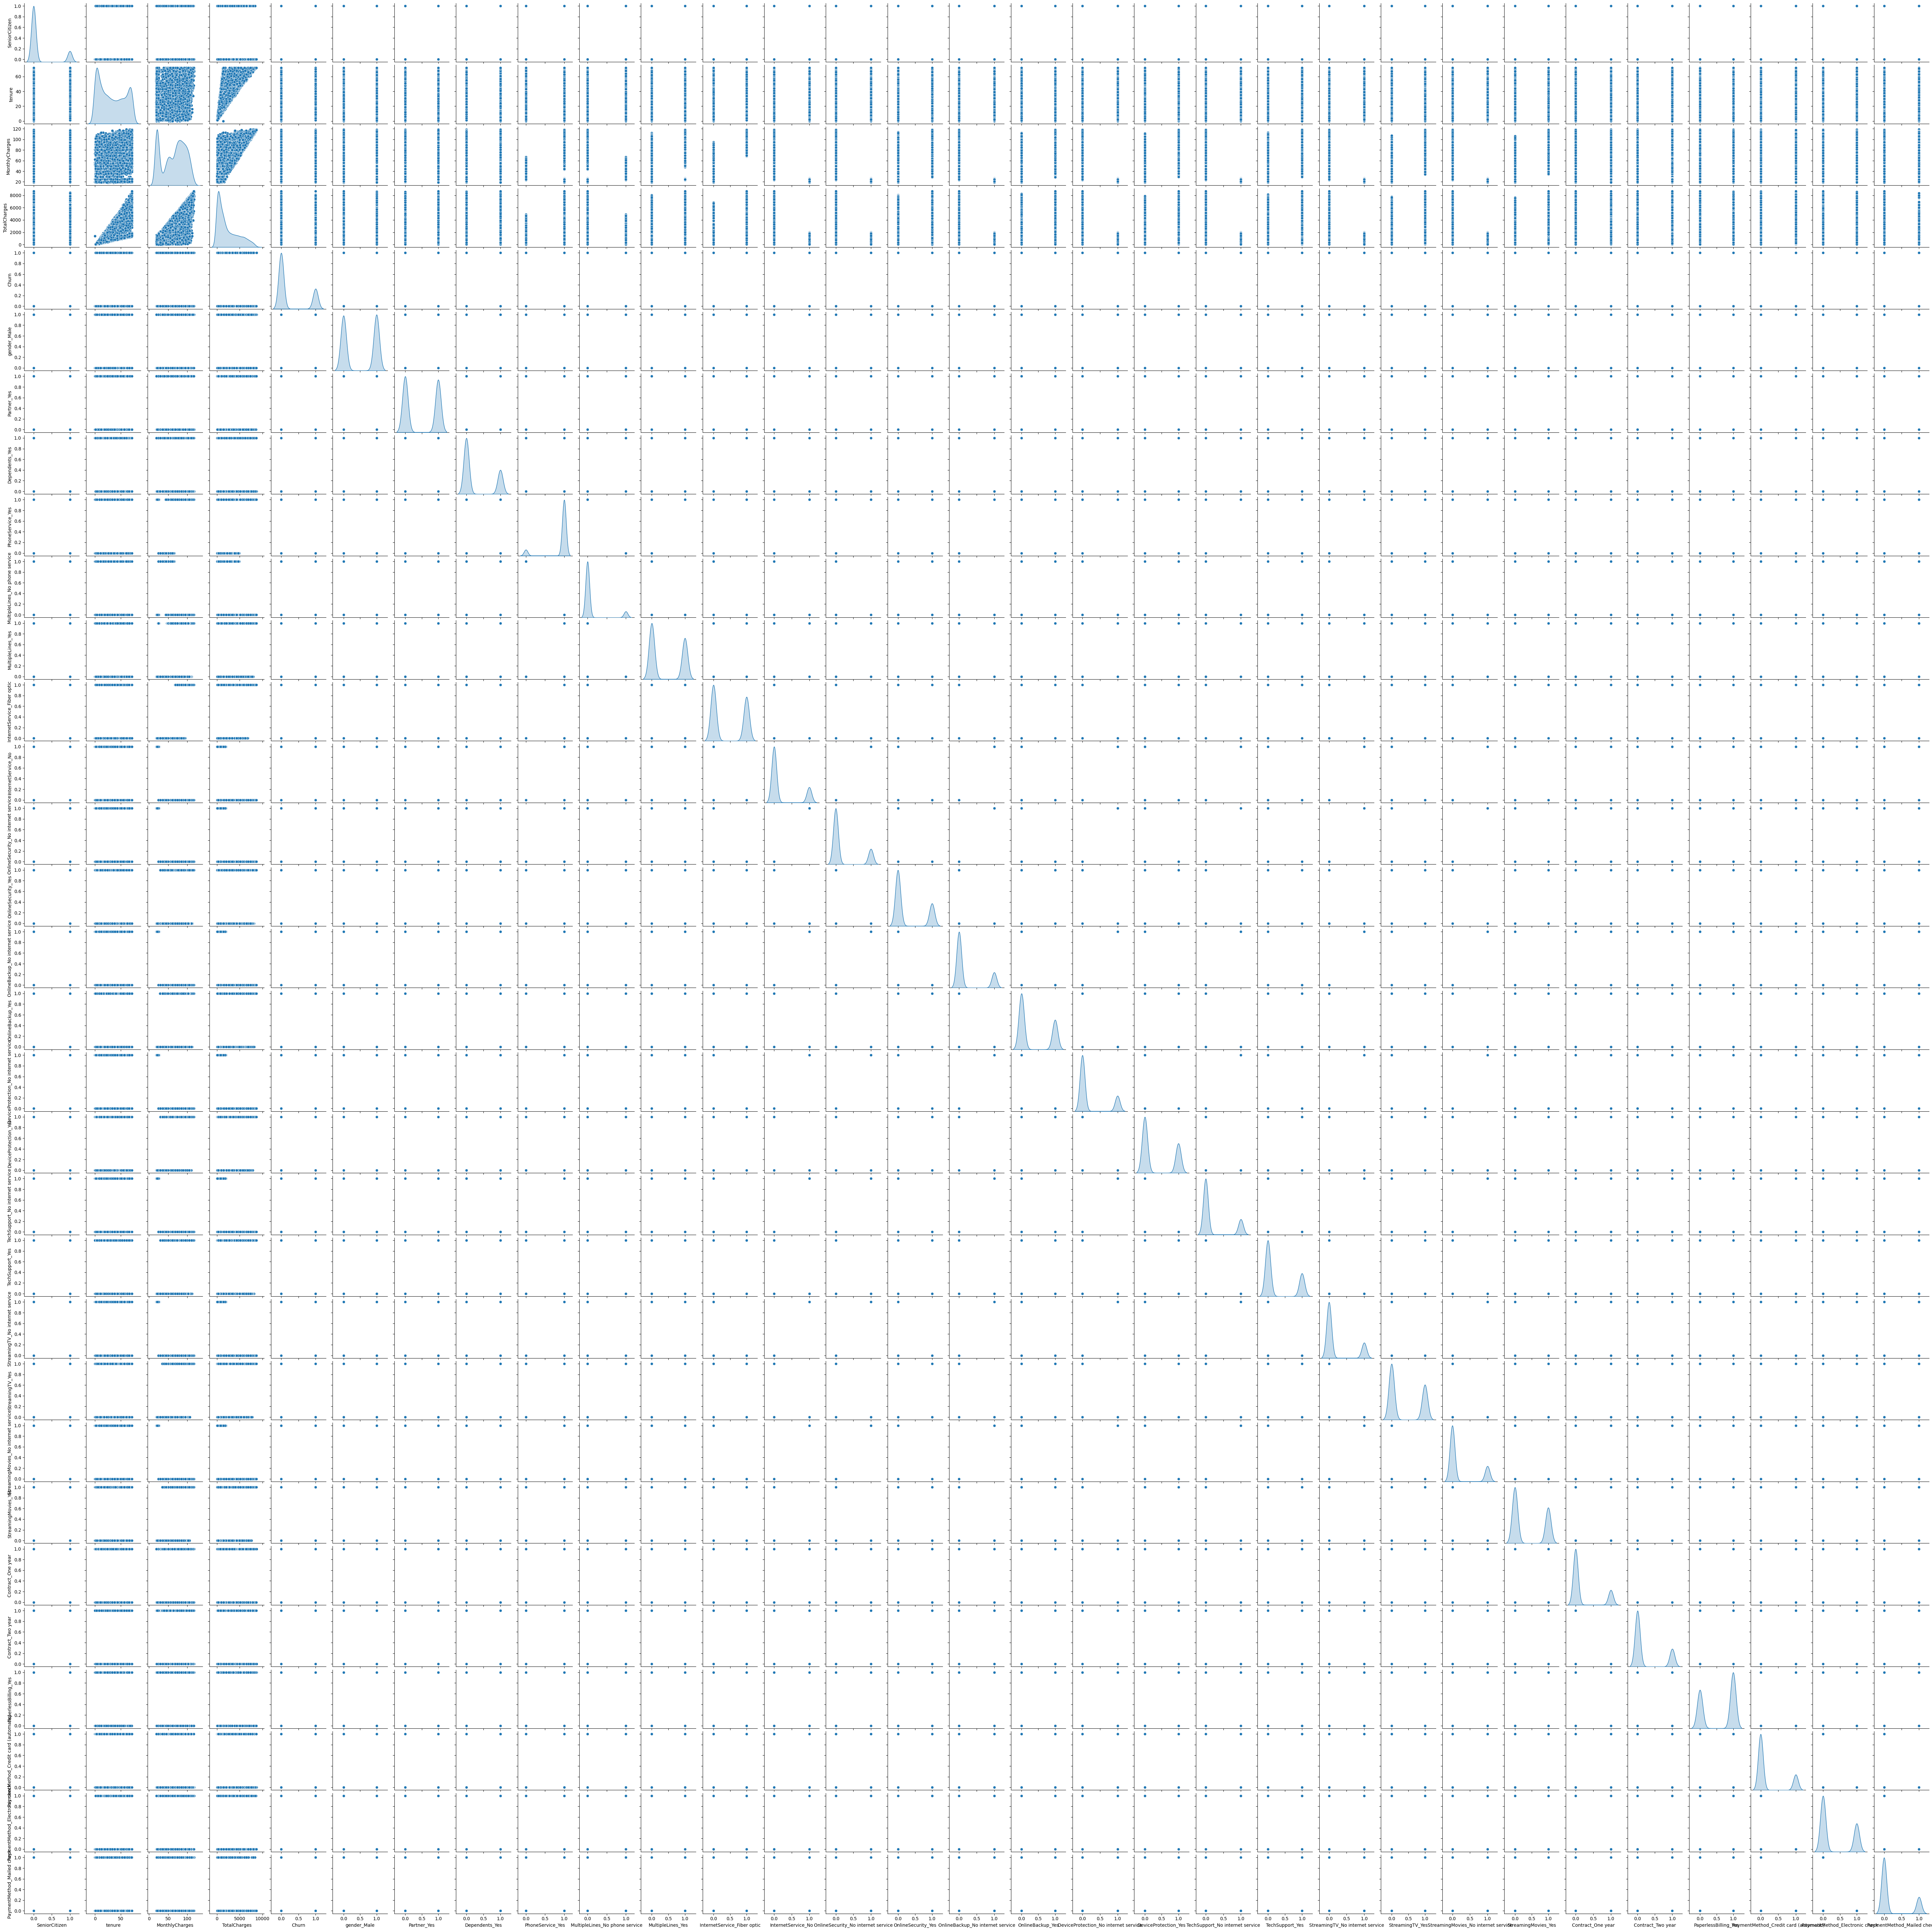

In [122]:
#Check for multicollinearity using Scatter Matrix
scatter_matrix = sns.pairplot(churn, diag_kind='kde', plot_kws={'alpha': 1})
scatter_matrix.fig.set_size_inches(60, 60)
plt.show()

# scaling

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(churn)
print(scaled)

[[0.         0.01388889 0.11542289 ... 0.         1.         0.        ]
 [0.         0.47222222 0.38507463 ... 0.         0.         1.        ]
 [0.         0.02777778 0.35422886 ... 0.         0.         1.        ]
 ...
 [0.         0.15277778 0.11293532 ... 0.         1.         0.        ]
 [1.         0.05555556 0.55870647 ... 0.         0.         1.        ]
 [0.         0.91666667 0.86965174 ... 0.         0.         0.        ]]


# Model

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=33,shuffle=True)
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=0.2,random_state=33)
LogisticRegressionModel.fit(x_train, y_train)
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(x_train,  y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(x_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel Train Score is :  0.7699734948882999
LogisticRegressionModel Test Score is :  0.771152754116979
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [100]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [127]:
y_pred = LogisticRegressionModel.predict(x_test)
y_pred_prob = LogisticRegressionModel.predict_proba(x_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [0 1 0 1 0 0 0 0 0 0]
Prediction Probabilities Value for LogisticRegressionModel is :  [[0.6117736  0.3882264 ]
 [0.41092241 0.58907759]
 [0.66830215 0.33169785]
 [0.42912365 0.57087635]
 [0.91818007 0.08181993]
 [0.89776366 0.10223634]
 [0.9011996  0.0988004 ]
 [0.90705564 0.09294436]
 [0.56273096 0.43726904]
 [0.81455469 0.18544531]]


In [128]:
acc =accuracy_score(y_test,y_pred)
print("accuracy score is : ",acc)

accuracy score is :  0.771152754116979


In [129]:
ps = precision_score(y_test,y_pred,average='macro')
print('precision score is',ps)

precision score is 0.7095829053976949


In [130]:
rc = recall_score(y_test,y_pred,average='macro')
print('recall_score',rc)

recall_score 0.6792130171740828


In [131]:
 fs = f1_score(y_test,y_pred, average=None)
print('f1 score is',fs)

f1 score is [0.84855318 0.53193961]


In [132]:
class_report_test = classification_report(y_test, y_pred)
print("\nClassification Report_test set:")
print(class_report_test)


Classification Report_test set:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1281
           1       0.60      0.48      0.53       480

    accuracy                           0.77      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.76      0.77      0.76      1761

